# Modelling NIQS Hardware

In [4]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from src import *

np.set_printoptions(precision=2)

## Strong Model Hypothesis (Same Low Rank as Target Map)

### GD

In [ ]:
n = 3
d = 2**n

state_input_list = [prepare_input(numberToBase(i, 6, n)) for i in range(6**n)]

np.random.seed(42)
X_target = generate_ginibre(d**2, 2)
choi_target = generate_choi(X_target)
state_target_list = [apply_map(state_input, choi_target) for state_input in state_input_list]


state_target_list = [apply_map(state_input, choi_target) for state_input in state_input_list]

model2 = ModelQuantumMap(n = 3, 
                         rank = d**2, 
                         state_input_list = state_input_list,
                         state_target_list = state_target_list,
                         lr = 0.05, 
                         h = 1e-4)

model2.train(num_iter = 10, 
             use_adam = False)

0: 0.327
1: 0.354


### ADAM

In [ ]:
n = 3
d = 2**n

state_input_list = [prepare_input(numberToBase(i, 6, n)) for i in range(6**n)]

np.random.seed(42)
X_target = generate_ginibre(d**2, 2)
choi_target = generate_choi(X_target)
state_target_list = [apply_map(state_input, choi_target) for state_input in state_input_list]


state_target_list = [apply_map(state_input, choi_target) for state_input in state_input_list]

model2 = ModelQuantumMap(n = 3, 
                         rank = 2, 
                         state_input_list = state_input_list,
                         state_target_list = state_target_list,
                         lr = 0.05, 
                         h = 1e-4)

model2.train(num_iter = 1000, 
             use_adam = True)

In [15]:
fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
plt.plot(model1.fid_list)
plt.plot(model2.fid_list)
plt.xlabel("Iteration")
plt.ylabel("Fidelity")
plt.legend(["GD", "ADAM"])
plt.grid()
plt.show()

NameError: name 'model1' is not defined

<Figure size 780x520 with 0 Axes>

### Compare Target Quantum Map to Fitted Models with a Random Pure state

In [17]:
for i in range(5):

    state_random = generate_state(d, 1)
    state_target = apply_map(state_random, choi_target)

    choi_model1 = generate_choi(model1.X_model)
    state_model1 = apply_map(state_random, choi_model1)
    print(state_fidelity(state_model1, state_target))

    choi_model2 = generate_choi(model2.X_model)
    state_model2 = apply_map(state_random, choi_model2)
    print(state_fidelity(state_model2, state_target))
    print("----")

0.9341355518856739
0.9999965525570009
----
0.9320316901692378
0.9999924241357576
----
0.975428990858538
0.9999992845553881
----
0.96801126739791
0.9999996282146467
----
0.9363787125886673
0.9999931147017656
----


## More Testing

### Full Rank Model (No Target Hypothesis)

In [7]:
n = 3
d = 2**n

np.random.seed(42)

X_target = generate_ginibre(d**2, 2)
choi_target = generate_choi(X_target)

model3 = ModelQuantumMap(n = 3, 
                         rank = d**2, 
                         lr = 0.05, 
                         h = 1e-4)

model3.train(choi_target = choi_target, 
             num_iter = 1000, 
             use_adam = True)

0: 0.529
1: 0.522
2: 0.526
3: 0.522
4: 0.490
5: 0.531
6: 0.507
7: 0.517
8: 0.505
9: 0.551
10: 0.547
11: 0.497
12: 0.517
13: 0.521
14: 0.554
15: 0.564
16: 0.490
17: 0.549
18: 0.557
19: 0.488
20: 0.603
21: 0.598
22: 0.587
23: 0.606
24: 0.616
25: 0.591
26: 0.659
27: 0.647
28: 0.664
29: 0.572
30: 0.616
31: 0.581
32: 0.520
33: 0.494
34: 0.620
35: 0.525
36: 0.586
37: 0.673
38: 0.631
39: 0.661
40: 0.649
41: 0.590
42: 0.689
43: 0.618
44: 0.585
45: 0.568
46: 0.597
47: 0.707
48: 0.632
49: 0.718
50: 0.695
51: 0.670
52: 0.804
53: 0.650
54: 0.725
55: 0.692
56: 0.675
57: 0.711
58: 0.780
59: 0.628
60: 0.738
61: 0.780
62: 0.715
63: 0.650
64: 0.619
65: 0.602
66: 0.739
67: 0.738
68: 0.612
69: 0.699
70: 0.713
71: 0.821
72: 0.786
73: 0.759
74: 0.770
75: 0.716
76: 0.782
77: 0.745
78: 0.763
79: 0.702
80: 0.799
81: 0.697
82: 0.753
83: 0.646
84: 0.797
85: 0.852
86: 0.767
87: 0.830
88: 0.666
89: 0.654
90: 0.719
91: 0.724
92: 0.858
93: 0.761
94: 0.715
95: 0.877
96: 0.736
97: 0.840
98: 0.865
99: 0.869
100: 0.701

755: 1.000
756: 1.000
757: 1.000
758: 1.000
759: 1.000
760: 1.000
761: 1.000
762: 1.000
763: 1.000
764: 1.000
765: 1.000
766: 1.000
767: 1.000
768: 1.000
769: 1.000
770: 1.000
771: 1.000
772: 1.000
773: 1.000
774: 1.000
775: 1.000
776: 1.000
777: 1.000
778: 0.999
779: 1.000
780: 1.000
781: 1.000
782: 1.000
783: 1.000
784: 1.000
785: 1.000
786: 1.000
787: 1.000
788: 1.000
789: 1.000
790: 1.000
791: 1.000
792: 1.000
793: 1.000
794: 1.000
795: 1.000
796: 1.000
797: 1.000
798: 1.000
799: 1.000
800: 1.000
801: 1.000
802: 1.000
803: 1.000
804: 1.000
805: 1.000
806: 1.000
807: 1.000
808: 1.000
809: 1.000
810: 1.000
811: 0.999
812: 1.000
813: 1.000
814: 1.000
815: 1.000
816: 0.999
817: 1.000
818: 1.000
819: 1.000
820: 1.000
821: 1.000
822: 1.000
823: 1.000
824: 1.000
825: 1.000
826: 1.000
827: 1.000
828: 1.000
829: 1.000
830: 1.000
831: 1.000
832: 1.000
833: 1.000
834: 1.000
835: 1.000
836: 1.000
837: 1.000
838: 1.000
839: 1.000
840: 0.999
841: 1.000
842: 1.000
843: 1.000
844: 1.000
845: 1.000

### Over-Constrained Model

In [5]:
n = 3
d = 2**n

np.random.seed(42)

X_target2 = generate_ginibre(d**2, 4)
choi_target2 = generate_choi(X_target2)

model4 = ModelQuantumMap(n = 3, 
                         rank = 2, 
                         lr = 0.05, 
                         h = 1e-4)

model4.train(choi_target = choi_target2, 
             num_iter = 2000, 
             use_adam = True)

0: 0.607
1: 0.498
2: 0.367
3: 0.545
4: 0.538
5: 0.394
6: 0.504
7: 0.445
8: 0.553
9: 0.536
10: 0.498
11: 0.532
12: 0.407
13: 0.530
14: 0.475
15: 0.488
16: 0.398
17: 0.552
18: 0.367
19: 0.455
20: 0.511
21: 0.533
22: 0.351
23: 0.447
24: 0.481
25: 0.590
26: 0.565
27: 0.413
28: 0.608
29: 0.401
30: 0.594
31: 0.500
32: 0.411
33: 0.364
34: 0.469
35: 0.446
36: 0.458
37: 0.544
38: 0.643
39: 0.596
40: 0.512
41: 0.492
42: 0.544
43: 0.633
44: 0.476
45: 0.502
46: 0.470
47: 0.539
48: 0.568
49: 0.339
50: 0.700
51: 0.542
52: 0.530
53: 0.466
54: 0.591
55: 0.515
56: 0.454
57: 0.605
58: 0.553
59: 0.533
60: 0.650
61: 0.549
62: 0.529
63: 0.545
64: 0.724
65: 0.639
66: 0.722
67: 0.489
68: 0.550
69: 0.568
70: 0.548
71: 0.617
72: 0.563
73: 0.572
74: 0.638
75: 0.501
76: 0.529
77: 0.609
78: 0.599
79: 0.663
80: 0.610
81: 0.627
82: 0.750
83: 0.553
84: 0.663
85: 0.630
86: 0.543
87: 0.581
88: 0.563
89: 0.632
90: 0.497
91: 0.608
92: 0.603
93: 0.598
94: 0.603
95: 0.642
96: 0.640
97: 0.593
98: 0.796
99: 0.606
100: 0.601

755: 0.815
756: 0.765
757: 0.881
758: 0.758
759: 0.847
760: 0.894
761: 0.802
762: 0.832
763: 0.858
764: 0.872
765: 0.820
766: 0.803
767: 0.873
768: 0.765
769: 0.860
770: 0.801
771: 0.734
772: 0.863
773: 0.793
774: 0.822
775: 0.745
776: 0.834
777: 0.816
778: 0.760
779: 0.748
780: 0.864
781: 0.903
782: 0.762
783: 0.777
784: 0.860
785: 0.835
786: 0.890
787: 0.752
788: 0.691
789: 0.894
790: 0.893
791: 0.766
792: 0.694
793: 0.741
794: 0.844
795: 0.773
796: 0.824
797: 0.864
798: 0.830
799: 0.878
800: 0.767
801: 0.796
802: 0.831
803: 0.788
804: 0.762
805: 0.905
806: 0.849
807: 0.852
808: 0.818
809: 0.863
810: 0.834
811: 0.766
812: 0.863
813: 0.837
814: 0.883
815: 0.860
816: 0.840
817: 0.867
818: 0.862
819: 0.886
820: 0.834
821: 0.900
822: 0.765
823: 0.866
824: 0.866
825: 0.877
826: 0.680
827: 0.865
828: 0.808
829: 0.797
830: 0.795
831: 0.879
832: 0.850
833: 0.722
834: 0.765
835: 0.855
836: 0.831
837: 0.862
838: 0.831
839: 0.846
840: 0.844
841: 0.852
842: 0.768
843: 0.753
844: 0.774
845: 0.696

1459: 0.801
1460: 0.725
1461: 0.847
1462: 0.882
1463: 0.825
1464: 0.778
1465: 0.831
1466: 0.804
1467: 0.717
1468: 0.789
1469: 0.889
1470: 0.772
1471: 0.857
1472: 0.862
1473: 0.896
1474: 0.797
1475: 0.865
1476: 0.789
1477: 0.866
1478: 0.848
1479: 0.801
1480: 0.760
1481: 0.744
1482: 0.848
1483: 0.851
1484: 0.800
1485: 0.721
1486: 0.810
1487: 0.792
1488: 0.867
1489: 0.746
1490: 0.805
1491: 0.840
1492: 0.714
1493: 0.827
1494: 0.829
1495: 0.861
1496: 0.873
1497: 0.858
1498: 0.883
1499: 0.841
1500: 0.770
1501: 0.794
1502: 0.893
1503: 0.819
1504: 0.782
1505: 0.832
1506: 0.803
1507: 0.726
1508: 0.785
1509: 0.897
1510: 0.830
1511: 0.812
1512: 0.814
1513: 0.834
1514: 0.839
1515: 0.820
1516: 0.870
1517: 0.900
1518: 0.742
1519: 0.865
1520: 0.844
1521: 0.736
1522: 0.859
1523: 0.789
1524: 0.885
1525: 0.824
1526: 0.877
1527: 0.863
1528: 0.773
1529: 0.837
1530: 0.861
1531: 0.836
1532: 0.794
1533: 0.871
1534: 0.776
1535: 0.816
1536: 0.882
1537: 0.792
1538: 0.822
1539: 0.821
1540: 0.817
1541: 0.820
1542

### Full Rank Target

In [10]:
n = 3
d = 2**n

np.random.seed(42)

X_target3 = generate_ginibre(d**2, d**2)
choi_target3 = generate_choi(X_target3)

model5 = ModelQuantumMap(n = 3, 
                         rank = d**2, 
                         lr = 0.05, 
                         h = 1e-4)

model5.train(choi_target = choi_target3, 
             num_iter = 1000, 
             use_adam = True)

0: 0.988
1: 0.984
2: 0.973
3: 0.971
4: 0.987
5: 0.974
6: 0.976
7: 0.985
8: 0.979
9: 0.970
10: 0.975
11: 0.989
12: 0.980
13: 0.979
14: 0.992
15: 0.979
16: 0.986
17: 0.979
18: 0.982
19: 0.975
20: 0.974
21: 0.980
22: 0.978
23: 0.980
24: 0.983
25: 0.998
26: 0.987
27: 0.986
28: 0.994
29: 0.989
30: 0.976
31: 0.984
32: 0.982
33: 0.988
34: 0.978
35: 0.995
36: 0.996
37: 0.983
38: 0.985
39: 0.985
40: 0.982
41: 0.988
42: 0.990
43: 0.985
44: 0.992
45: 0.987
46: 0.989
47: 0.995
48: 0.983
49: 0.994
50: 0.996
51: 0.986
52: 0.991
53: 0.992
54: 0.989
55: 0.994
56: 0.995
57: 0.983
58: 0.988
59: 0.988
60: 0.992
61: 0.998
62: 0.982
63: 0.991
64: 0.986
65: 0.986
66: 0.983
67: 0.987
68: 0.990
69: 0.995
70: 0.991
71: 0.991
72: 0.992
73: 0.990
74: 0.991
75: 0.990
76: 0.989
77: 0.983
78: 0.993
79: 0.993
80: 0.993
81: 0.995
82: 0.989
83: 0.994
84: 0.996
85: 0.995
86: 0.992
87: 0.995
88: 0.992
89: 0.998
90: 0.997
91: 0.997
92: 0.992
93: 0.998
94: 0.996
95: 0.990
96: 0.996
97: 0.998
98: 0.992
99: 0.993
100: 0.990

755: 1.000
756: 1.000
757: 1.000
758: 1.000
759: 1.000
760: 1.000
761: 1.000
762: 1.000
763: 1.000
764: 1.000
765: 1.000
766: 1.000
767: 1.000
768: 1.000
769: 1.000
770: 1.000
771: 1.000
772: 1.000
773: 1.000
774: 1.000
775: 1.000
776: 1.000
777: 1.000
778: 1.000
779: 1.000
780: 1.000
781: 1.000
782: 1.000
783: 1.000
784: 1.000
785: 1.000
786: 1.000
787: 1.000
788: 1.000
789: 1.000
790: 1.000
791: 1.000
792: 1.000
793: 1.000
794: 1.000
795: 1.000
796: 1.000
797: 1.000
798: 1.000
799: 1.000
800: 1.000
801: 1.000
802: 1.000
803: 1.000
804: 1.000
805: 1.000
806: 1.000
807: 1.000
808: 1.000
809: 1.000
810: 1.000
811: 1.000
812: 1.000
813: 1.000
814: 1.000
815: 1.000
816: 1.000
817: 1.000
818: 1.000
819: 1.000
820: 1.000
821: 1.000
822: 1.000
823: 1.000
824: 1.000
825: 1.000
826: 1.000
827: 1.000
828: 1.000
829: 1.000
830: 1.000
831: 1.000
832: 1.000
833: 1.000
834: 1.000
835: 1.000
836: 1.000
837: 1.000
838: 1.000
839: 1.000
840: 1.000
841: 1.000
842: 1.000
843: 1.000
844: 1.000
845: 1.000

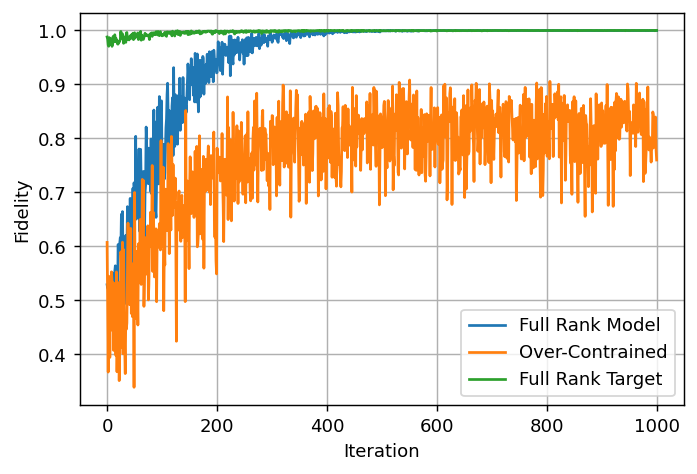

In [12]:
fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
plt.plot(model3.fid_list)
plt.plot(model4.fid_list[:1000])
plt.plot(model5.fid_list)
plt.xlabel("Iteration")
plt.ylabel("Fidelity")
plt.legend(["Full Rank Model", "Over-Contrained", "Full Rank Target"])
plt.grid()
plt.show()

In [55]:
H = 1/np.sqrt(2)*np.array([[1, 1], [1, -1]])
I = np.eye(2)
ME = np.array([[0.5, 0, 0, 0.5], [0, 0, 0, 0], [0, 0, 0, 0], [0.5, 0, 0, 0.5]])
U = np.kron(H, I)

choi = 2*U@ME@U

state = np.array([[0, 0], [0, 1]])
state = apply_map(state, choi)
#state = apply_map(state, choi)
print(state)

[[ 0.5 -0.5]
 [-0.5  0.5]]


## 4 Qubits

In [83]:
n = 4
d = 2**n

np.random.seed(42)

X_target = generate_ginibre(d**2, 2)
choi_target = generate_choi(X_target)

model2 = ModelQuantumMap(n = 4, 
                         rank = 2, 
                         lr = 0.05, 
                         h = 1e-4)

model2.train(choi_target = choi_target, 
             num_iter = 2000, 
             use_adam = True)

0: 0.342
1: 0.416
2: 0.314
3: 0.278
4: 0.334
5: 0.228
6: 0.324
7: 0.362
8: 0.381
9: 0.246
10: 0.341
11: 0.330
12: 0.237
13: 0.222
14: 0.419
15: 0.511
16: 0.262
17: 0.243
18: 0.384
19: 0.412
20: 0.376
21: 0.368
22: 0.209
23: 0.481
24: 0.308
25: 0.521
26: 0.351
27: 0.293
28: 0.459
29: 0.314
30: 0.385
31: 0.464
32: 0.427
33: 0.231
34: 0.526
35: 0.362
36: 0.297
37: 0.300
38: 0.380
39: 0.481
40: 0.246
41: 0.442
42: 0.335
43: 0.303
44: 0.472
45: 0.457
46: 0.374
47: 0.265
48: 0.542
49: 0.417
50: 0.405
51: 0.478
52: 0.526
53: 0.412
54: 0.390
55: 0.438
56: 0.443
57: 0.573
58: 0.395
59: 0.404
60: 0.277
61: 0.408
62: 0.488
63: 0.479
64: 0.212
65: 0.392
66: 0.336
67: 0.304
68: 0.484
69: 0.373
70: 0.494
71: 0.341
72: 0.555
73: 0.527
74: 0.330
75: 0.247
76: 0.510
77: 0.246
78: 0.448
79: 0.380
80: 0.691
81: 0.495
82: 0.557
83: 0.483
84: 0.375
85: 0.470
86: 0.540
87: 0.419
88: 0.459
89: 0.484
90: 0.500
91: 0.472
92: 0.340
93: 0.558
94: 0.636
95: 0.526
96: 0.572
97: 0.438
98: 0.576
99: 0.488
100: 0.579

755: 0.987
756: 0.984
757: 0.975
758: 0.995
759: 0.990
760: 0.996
761: 0.996
762: 0.981
763: 0.987
764: 0.993
765: 0.997
766: 0.974
767: 0.980
768: 0.994
769: 0.993
770: 0.982
771: 0.993
772: 0.995
773: 0.994
774: 0.997
775: 0.996
776: 0.992
777: 0.992
778: 0.964
779: 0.998
780: 0.976
781: 0.984
782: 0.996
783: 0.992
784: 0.992
785: 0.979
786: 0.997
787: 0.994
788: 0.997
789: 0.997
790: 0.997
791: 0.994
792: 0.990
793: 0.996
794: 0.999
795: 0.993
796: 0.999
797: 0.982
798: 0.991
799: 0.998
800: 0.998
801: 0.998
802: 0.994
803: 0.996
804: 0.996
805: 0.995
806: 0.987
807: 0.988
808: 0.993
809: 0.990
810: 0.979
811: 0.998
812: 0.987
813: 0.989
814: 0.996
815: 0.993
816: 0.966
817: 0.991
818: 0.989
819: 0.999
820: 0.986
821: 0.993
822: 0.986
823: 0.991
824: 0.997
825: 0.997
826: 0.999
827: 0.991
828: 0.992
829: 0.995
830: 0.998
831: 0.998
832: 0.994
833: 0.998
834: 0.997
835: 0.998
836: 0.998
837: 0.993
838: 0.998
839: 0.995
840: 0.995
841: 0.998
842: 0.993
843: 0.997
844: 0.990
845: 0.997

1459: 1.000
1460: 1.000
1461: 1.000
1462: 1.000
1463: 1.000
1464: 1.000
1465: 1.000
1466: 1.000
1467: 1.000
1468: 1.000
1469: 1.000
1470: 1.000
1471: 1.000
1472: 1.000
1473: 1.000
1474: 1.000
1475: 1.000
1476: 1.000
1477: 1.000
1478: 1.000
1479: 1.000
1480: 1.000
1481: 1.000
1482: 1.000
1483: 1.000
1484: 1.000
1485: 1.000
1486: 1.000
1487: 1.000
1488: 1.000
1489: 1.000
1490: 1.000
1491: 1.000
1492: 1.000
1493: 1.000
1494: 1.000
1495: 1.000
1496: 1.000
1497: 1.000
1498: 1.000
1499: 1.000
1500: 1.000
1501: 1.000
1502: 1.000
1503: 1.000
1504: 1.000
1505: 1.000
1506: 1.000
1507: 1.000
1508: 1.000
1509: 1.000
1510: 1.000
1511: 1.000
1512: 1.000
1513: 1.000
1514: 1.000
1515: 1.000
1516: 1.000
1517: 1.000
1518: 1.000
1519: 1.000
1520: 1.000
1521: 1.000
1522: 1.000
1523: 1.000
1524: 1.000
1525: 1.000
1526: 1.000
1527: 1.000
1528: 1.000
1529: 1.000
1530: 1.000
1531: 1.000
1532: 1.000
1533: 1.000
1534: 1.000
1535: 1.000
1536: 1.000
1537: 1.000
1538: 1.000
1539: 1.000
1540: 1.000
1541: 1.000
1542

In [84]:
n = 3
d = 2**n

np.random.seed(42)

X_target = generate_ginibre(d**2, 6)
choi_target = generate_choi(X_target)

model2 = ModelQuantumMap(n = 3, 
                         rank = 6, 
                         lr = 0.05, 
                         h = 1e-4)

model2.train(choi_target = choi_target, 
             num_iter = 1000, 
             use_adam = True)

0: 0.621
1: 0.732
2: 0.666
3: 0.600
4: 0.626
5: 0.745
6: 0.650
7: 0.773
8: 0.650
9: 0.600
10: 0.701
11: 0.723
12: 0.743
13: 0.709
14: 0.681
15: 0.572
16: 0.683
17: 0.788
18: 0.625
19: 0.725
20: 0.760
21: 0.742
22: 0.678
23: 0.838
24: 0.734
25: 0.703
26: 0.671
27: 0.713
28: 0.741
29: 0.740
30: 0.736
31: 0.662
32: 0.798
33: 0.699
34: 0.605
35: 0.674
36: 0.678
37: 0.890
38: 0.804
39: 0.764
40: 0.725
41: 0.790
42: 0.810
43: 0.801
44: 0.697
45: 0.718
46: 0.737
47: 0.747
48: 0.812
49: 0.733
50: 0.773
51: 0.775
52: 0.755
53: 0.764
54: 0.733
55: 0.865
56: 0.741
57: 0.753
58: 0.761
59: 0.811
60: 0.868
61: 0.797
62: 0.714
63: 0.757
64: 0.784
65: 0.762
66: 0.767
67: 0.769
68: 0.685
69: 0.785
70: 0.888
71: 0.839
72: 0.771
73: 0.715
74: 0.724
75: 0.806
76: 0.817
77: 0.827
78: 0.916
79: 0.714
80: 0.816
81: 0.769
82: 0.836
83: 0.828
84: 0.775
85: 0.788
86: 0.860
87: 0.854
88: 0.797
89: 0.829
90: 0.813
91: 0.789
92: 0.773
93: 0.738
94: 0.856
95: 0.837
96: 0.790
97: 0.840
98: 0.794
99: 0.866
100: 0.873

755: 1.000
756: 1.000
757: 1.000
758: 1.000
759: 1.000
760: 1.000
761: 1.000
762: 1.000
763: 1.000
764: 1.000
765: 0.999
766: 1.000
767: 1.000
768: 1.000
769: 1.000
770: 1.000
771: 1.000
772: 1.000
773: 1.000
774: 1.000
775: 1.000
776: 1.000
777: 1.000
778: 1.000
779: 1.000
780: 1.000
781: 1.000
782: 1.000
783: 1.000
784: 1.000
785: 1.000
786: 1.000
787: 1.000
788: 1.000
789: 1.000
790: 1.000
791: 1.000
792: 1.000
793: 1.000
794: 1.000
795: 1.000
796: 1.000
797: 1.000
798: 1.000
799: 1.000
800: 1.000
801: 1.000
802: 1.000
803: 1.000
804: 1.000
805: 1.000
806: 1.000
807: 0.999
808: 1.000
809: 1.000
810: 1.000
811: 1.000
812: 1.000
813: 1.000
814: 1.000
815: 1.000
816: 1.000
817: 1.000
818: 1.000
819: 1.000
820: 1.000
821: 1.000
822: 1.000
823: 1.000
824: 1.000
825: 1.000
826: 1.000
827: 1.000
828: 1.000
829: 1.000
830: 1.000
831: 1.000
832: 1.000
833: 1.000
834: 1.000
835: 1.000
836: 1.000
837: 1.000
838: 1.000
839: 1.000
840: 1.000
841: 1.000
842: 1.000
843: 1.000
844: 1.000
845: 1.000